In [90]:
import os
import sys

import numpy as np
import cv2

In [91]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [92]:
def calibration_parameters(path, cshape):
    """Compute calibration parameters from a set of calibration images.
    
    Params:
      path: Directory of calibration images.
      cshape: Shape of grid used in the latter.
    Return:
      mtx, dist
    """
    # Object / image points collections.
    objpoints = []
    imgpoints = []

    # Calibration points from images.
    filenames = os.listdir(path)
    for fname in filenames:
        img = cv2.imread(path + fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Theoretical Grid.
        objp = np.zeros((cshape[0] * cshape[1], 3), np.float32)
        objp[:, :2] = np.mgrid[0:cshape[0], 0:cshape[1]].T.reshape(-1, 2)
        # Corners in the image.
        ret, corners = cv2.findChessboardCorners(gray, cshape, None)
        if ret:
            objpoints.append(objp)
            imgpoints.append(corners)
        else:
            print('Warning! Not chessboard found in the image', fname)
    
    # Calibration from image points.
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    return mtx, dist

In [93]:
# Calibration parameters.
cshape = (9, 6)
path = 'camera_cal/'
mtx, dist = calibration_parameters(path, cshape)

Warning! Not chessboard found in the image calibration1.jpg
Warning! Not chessboard found in the image calibration4.jpg
Warning! Not chessboard found in the image calibration5.jpg


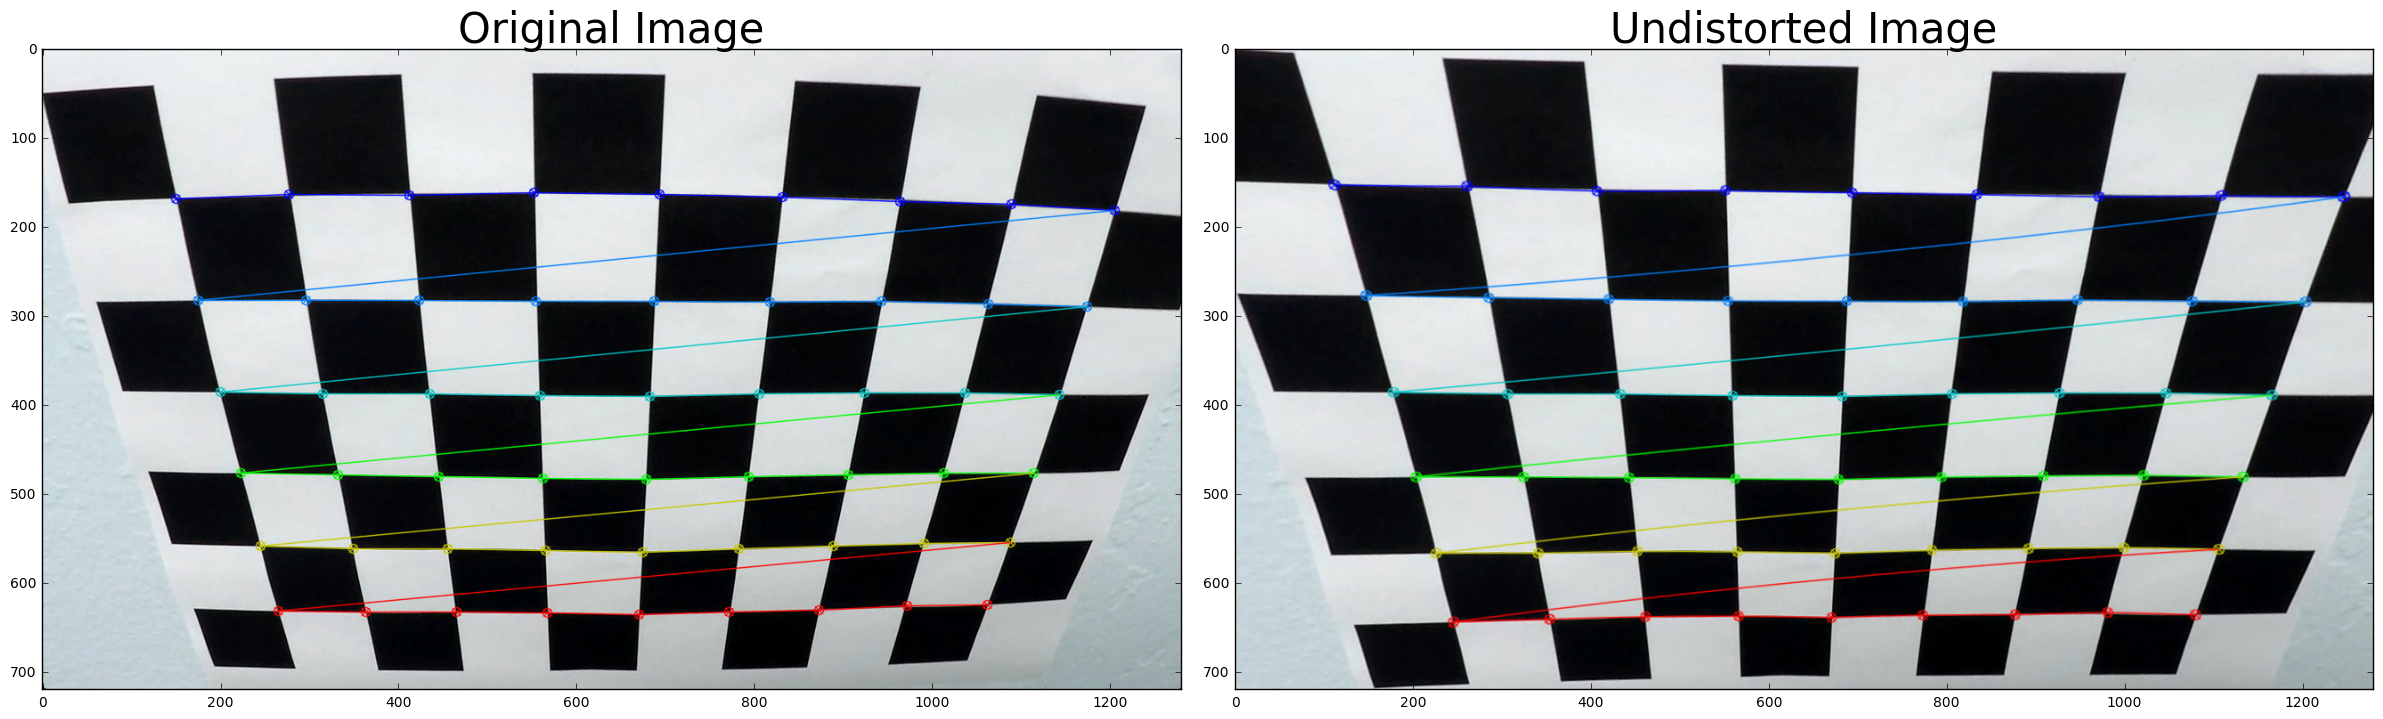

In [94]:
# Test the calibration on some image.
filenames = os.listdir(path)
img = cv2.imread(path + filenames[11])
ret, corners = cv2.findChessboardCorners(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cshape, None)
img = cv2.drawChessboardCorners(img, cshape, corners, ret)
undst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undst)
ax2.set_title('Undistorted Image', fontsize=30)

In [95]:
# Gradients!


test_images/solidWhiteRight.jpg


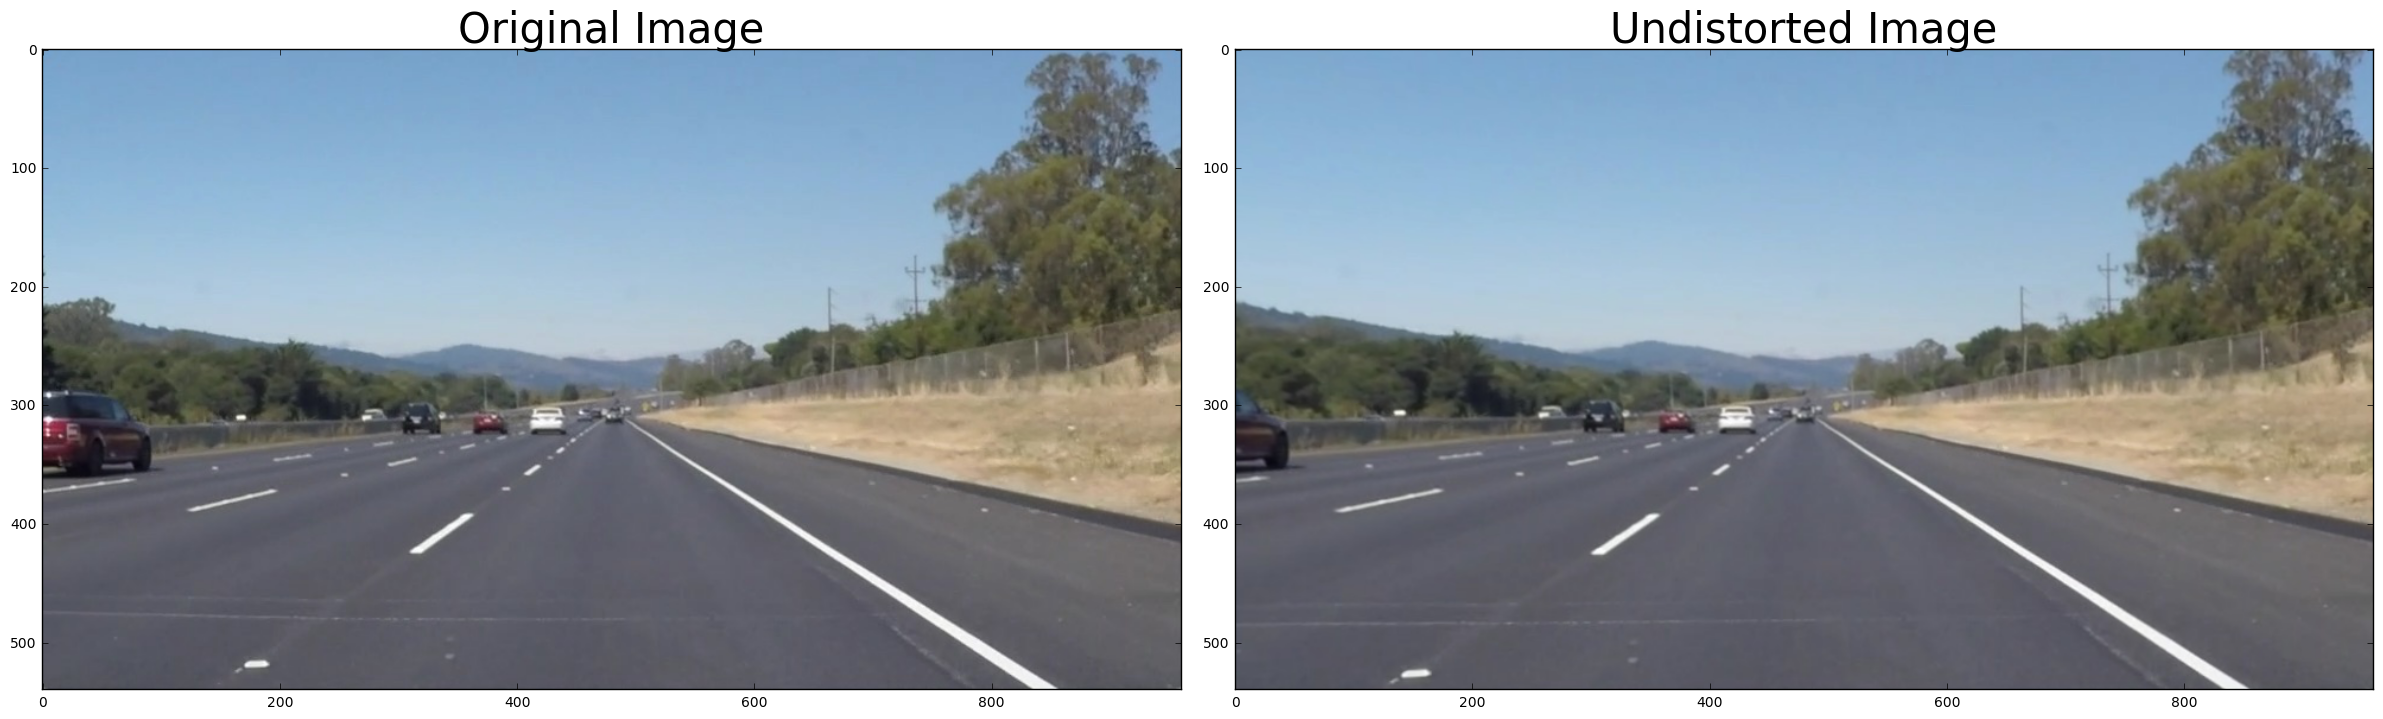

In [109]:
# Test on some image...
path = 'test_images/'
filename = path + os.listdir(path)[2]
print(filename)
img = mpimg.imread(filename)
undst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undst)
ax2.set_title('Undistorted Image', fontsize=30)